# Boston House prices dataset 

### Import libraries 

In [29]:
### Import 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno # To get visual representation of missing values

import math
import scipy.stats as stats
from scipy.stats import skew
import statsmodels.api as sm

import sklearn.compose 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore') # To ignore the warnings

In [30]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context ='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

### Import dataset from Sklearn

In [31]:
from sklearn.datasets import load_boston

In [32]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Define ours variables

Let's define out target variable and our inputs 

In [33]:
X_inputs = pd.DataFrame(boston.data, columns=boston.feature_names)

X_inputs.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [34]:
y_target = pd.Series(boston.target, name='MEDV')

Creating training and test data set. 

In [35]:
print(f'Shape of X_inputs: {X_inputs.shape}')
print(f'Shape of y_target: {y_target.shape}')

Shape of X_inputs: (506, 13)
Shape of y_target: (506,)


In [36]:
X, X_test, y, y_test = train_test_split(
    X_inputs,
    y_target,
    #test_size=0.25,
    random_state=1
)

In [37]:
df = pd.concat([X, y], axis=1)

In [38]:
X.shape

(379, 13)

### Checking missing values

In [39]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### EDA

CRIM (Mean) = 3.8
STD = 9.37 
There is a lot of variacion 

In [40]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.805183,11.521108,11.220053,0.081794,0.554073,6.255726,68.751451,3.824433,9.525066,405.182058,18.478100,358.304802,12.936174
std,9.375846,23.492644,6.875362,0.274413,0.117825,0.687415,28.276504,2.138449,8.734550,169.483657,2.141433,89.601791,7.243381
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.083475,0.000000,5.255000,0.000000,0.447500,5.875000,45.050000,2.094450,4.000000,277.000000,17.400000,376.125000,7.165000
50%,0.245220,0.000000,9.690000,0.000000,0.538000,6.172000,79.200000,3.317500,5.000000,329.000000,19.100000,392.040000,11.970000
75%,3.683390,17.750000,18.100000,0.000000,0.624000,6.611000,94.050000,5.108550,24.000000,666.000000,20.200000,396.220000,17.135000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [41]:
y.describe()

count    379.000000
mean      22.344591
std        8.920931
min        5.000000
25%       17.100000
50%       20.800000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [42]:
X.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.195484,0.389041,-0.064685,0.403533,-0.206140,0.348293,-0.370307,0.607924,0.570912,0.282849,-0.372070,0.442998
ZN,-0.195484,1.000000,-0.544895,-0.035765,-0.520324,0.336601,-0.588529,0.700130,-0.318524,-0.312923,-0.403056,0.169418,-0.420601
INDUS,0.389041,-0.544895,1.000000,0.036735,0.768276,-0.388148,0.646452,-0.713545,0.586062,0.704795,0.387252,-0.353812,0.598079
CHAS,-0.064685,-0.035765,0.036735,1.000000,0.098402,0.101530,0.067883,-0.092186,-0.009136,-0.044917,-0.119846,0.046263,-0.047730
NOX,0.403533,-0.520324,0.768276,0.098402,1.000000,-0.325283,0.726234,-0.764939,0.608815,0.670951,0.189482,-0.388886,0.598603
RM,-0.206140,0.336601,-0.388148,0.101530,-0.325283,1.000000,-0.286281,0.248623,-0.200272,-0.267035,-0.355134,0.136416,-0.611438
AGE,0.348293,-0.588529,0.646452,0.067883,0.726234,-0.286281,1.000000,-0.752379,0.456785,0.509776,0.278642,-0.290676,0.637677
DIS,-0.370307,0.700130,-0.713545,-0.092186,-0.764939,0.248623,-0.752379,1.000000,-0.490342,-0.537312,-0.241096,0.286775,-0.510071
RAD,0.607924,-0.318524,0.586062,-0.009136,0.608815,-0.200272,0.456785,-0.490342,1.000000,0.919322,0.465916,-0.442095,0.475813
TAX,0.570912,-0.312923,0.704795,-0.044917,0.670951,-0.267035,0.509776,-0.537312,0.919322,1.000000,0.464998,-0.439585,0.525850


<Axes: >

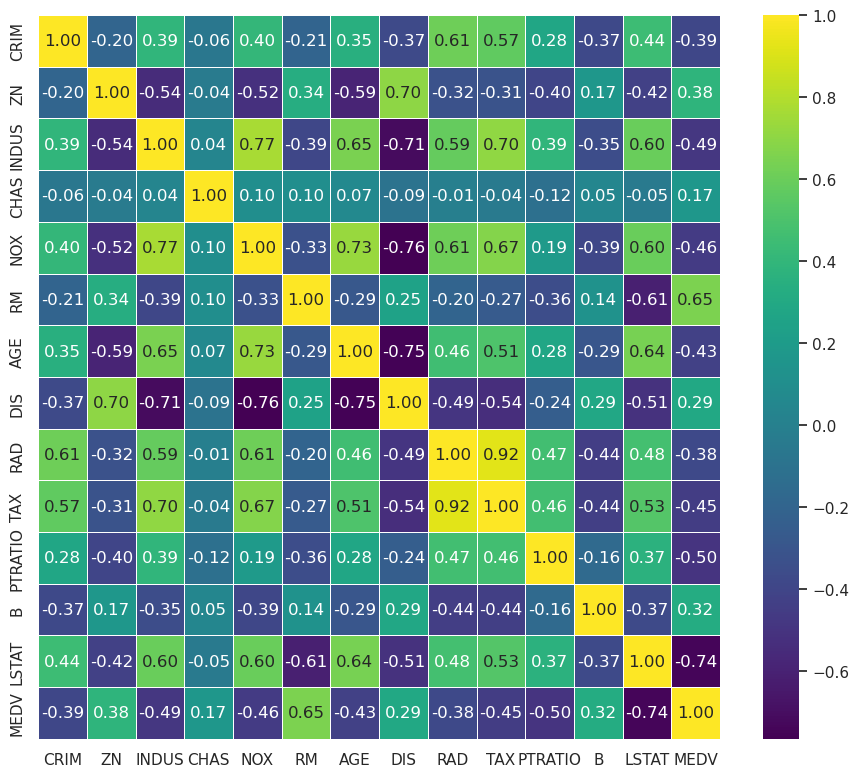

In [43]:
sns.heatmap(
    df.corr(),
    annot=True,
    cmap='viridis',
    fmt='.2f',
    linewidths=0.5
)

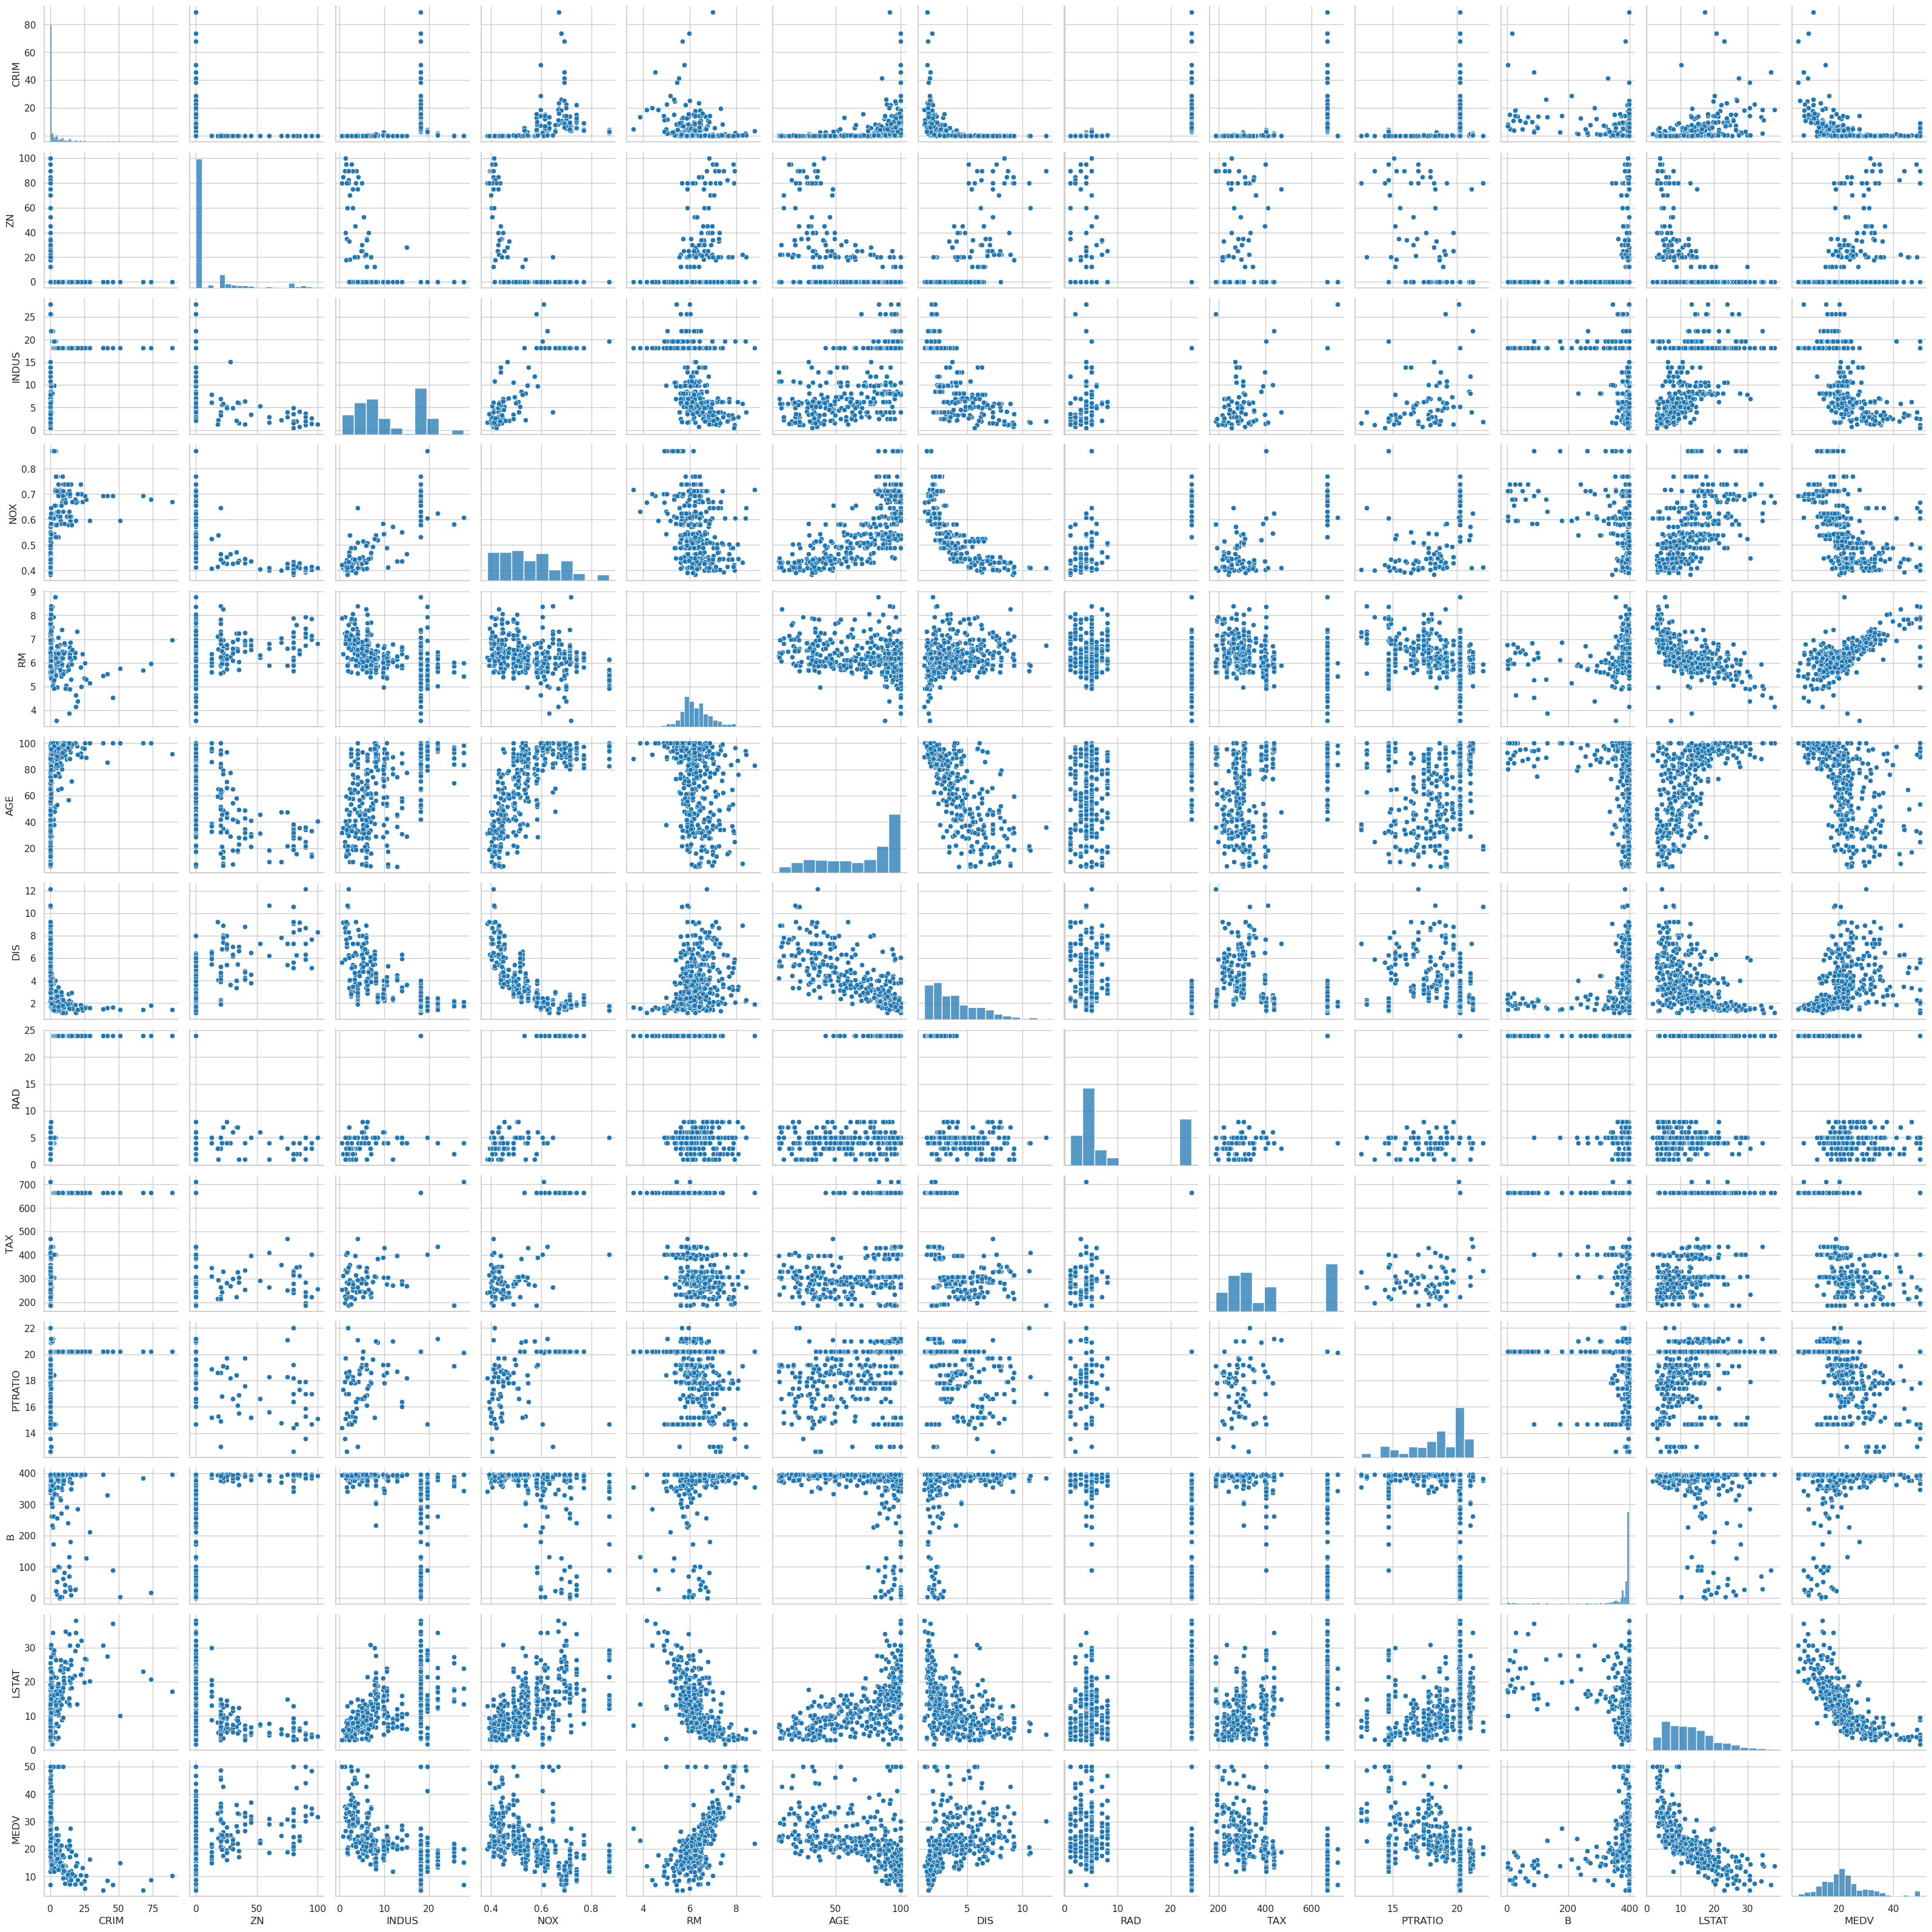

In [44]:
sns.pairplot(
    df.drop(
        'CHAS', 
        axis=1
    ),
)

Drop 'CHAS' since is a binary variable

In [45]:
# (
#     df
#     .drop(['CHAS', 'MEDV'], axis=1)
#     .hist(
#         layout=(4,3),
#         grid=False,
#     )
# );
# plt.tight_layout();

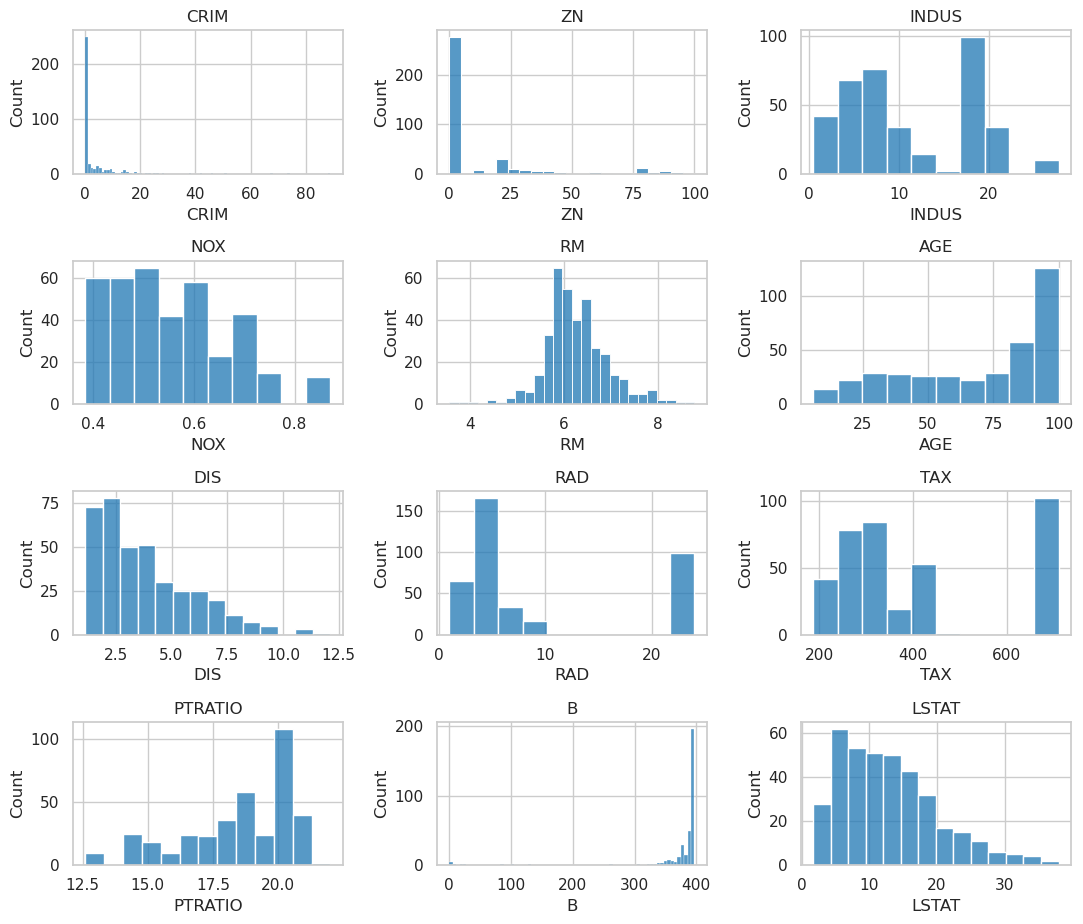

In [46]:
df_filtered = df.drop(['CHAS', 'MEDV'], axis=1) 

fig, ax = plt.subplots(4, 3)

ax = ax.flatten()

for i, column in enumerate(df_filtered.columns):
    sns.histplot(
        ax=ax[i],
        data=df_filtered,
        x=column,
        
    )
    ax[i].set_title(column)

plt.tight_layout()

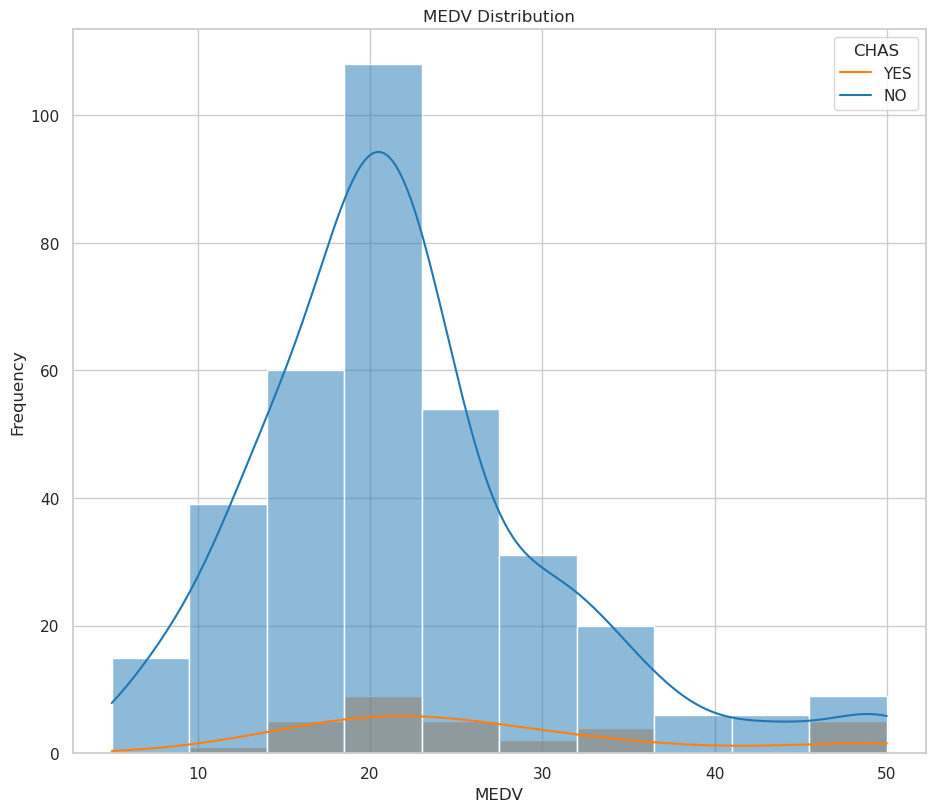

In [47]:
sns.histplot(
    data=df,
    x='MEDV',
    kde=True,
    hue='CHAS',
    bins=10
);

plt.title('MEDV Distribution');
plt.ylabel('Frequency' );
plt.legend(title='CHAS' ,loc='upper right', labels=['YES', 'NO']);

**Observation**
- CHAS has a normal distribution
- MEDV has outlier values 

<Axes: ylabel='MEDV'>

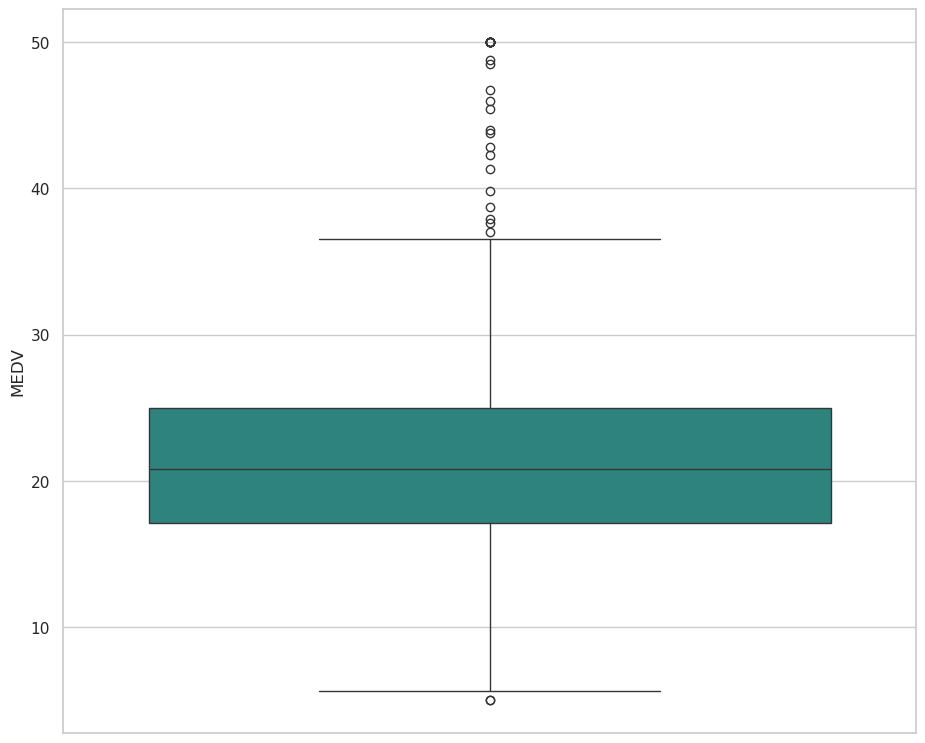

In [48]:
sns.boxplot(
    data = df, 
    y = 'MEDV',
    orient='h',
    palette='viridis'
)

It's necesary drop the outliers because it can present potencial problems when we have to fit the lineal model and assumptions 

### Fitting lineal model

First, we use SKLEARN

In [49]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [50]:
y_pred = lin_reg.predict(X_test)
print(f'Predictions: {y_pred[:4]}, real values: {y[:4].values}')

Predictions: [32.37816533 27.95684437 18.07213891 21.63166556], real values: [20.6 23.1 28.  20. ]


In [51]:
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}')
print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred)}')
print(f'Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'R^2 Score: {r2_score(y_test, y_pred)}')

Mean Squared Error (MSE): 21.897765396049415
Mean Absolute Error (MAE): 3.5748681261275452
Root Mean Squared Error (RMSE): 4.679504823808756
R^2 Score: 0.7789410172622866


In [52]:
residuals = y_test - y_pred
residuals.mean()

-0.1902474792284674

Now we will use Stats Models

In [53]:
X_constant = sm.add_constant(X)
lin_reg_sm = sm.OLS(y, X_constant).fit()

In [54]:
print(lin_reg_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     71.07
Date:                Wed, 21 Aug 2024   Prob (F-statistic):           1.72e-91
Time:                        09:31:04   Log-Likelihood:                -1127.6
No. Observations:                 379   AIC:                             2283.
Df Residuals:                     365   BIC:                             2338.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.1925      6.005      7.526      0.0

### Model Assumptions

### 1. Normality of residuals


In [55]:
residuals_sm = lin_reg_sm.resid

fitted_values = lin_reg_sm.predict()

print(f'Mean of residuals: {residuals_sm.mean()}')

Mean of residuals: -1.4998263551664384e-15


1.1. Prueba de normalidad con Q-Q plot

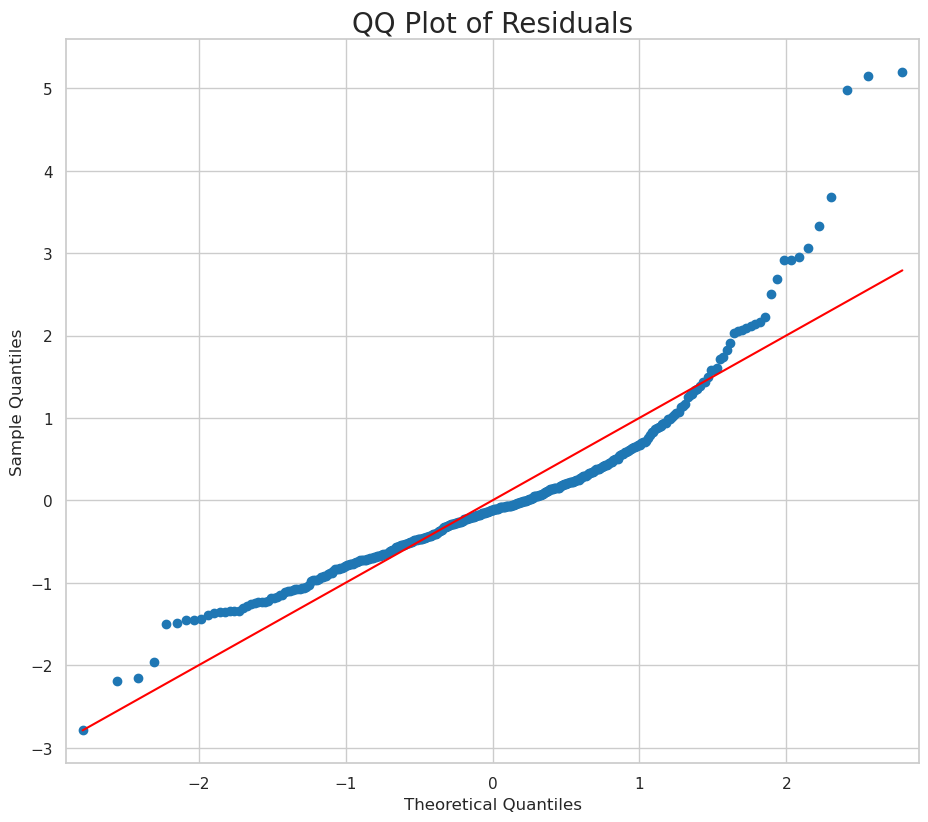

In [56]:
sm.graphics.qqplot(residuals_sm, line='s', fit=True);
plt.title('QQ Plot of Residuals', fontsize=20);

1.2 Shapiro-wilk 

In [57]:
stats.shapiro(residuals_sm)

ShapiroResult(statistic=0.8845527815541812, pvalue=2.858500930662641e-16)

**Observation**
- Con un p-value tan bajo (2.85-16) Rechazamos la H0, los residuos no siguen una distribución normal.
- El valor de la estadística es 0.88, también sugiere que los residuos se desvian significativamente de la normalidad.

### 2. Lineality 

Text(0.5, 1.0, 'Fitted Values vs. Real Values')

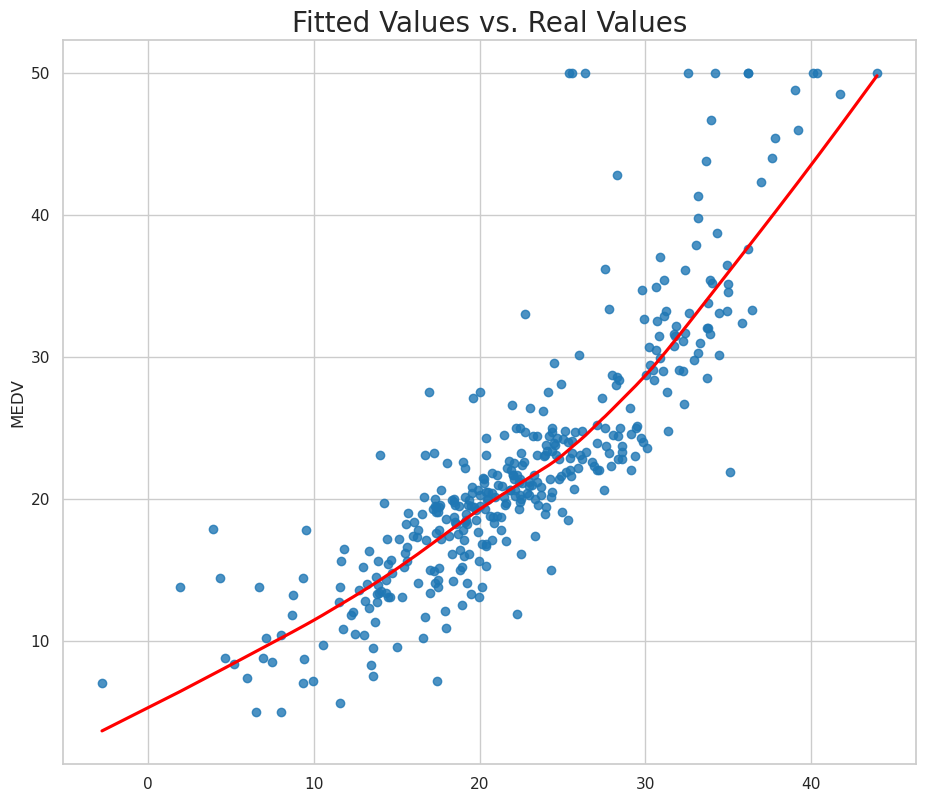

In [58]:
sns.regplot(
    data=df,
    x = fitted_values,
    y = y,
    lowess=True,
    line_kws={'color': 'red'},
    ci=None
);
plt.title('Fitted Values vs. Real Values', fontsize=20)

**Observation**
- No cumple con la linealidad, existen valores extremos que podrian afectar al modelo, la linealidad es el mal menor. 

### 3. Homocedasticidad (Igualdad de varianzas)

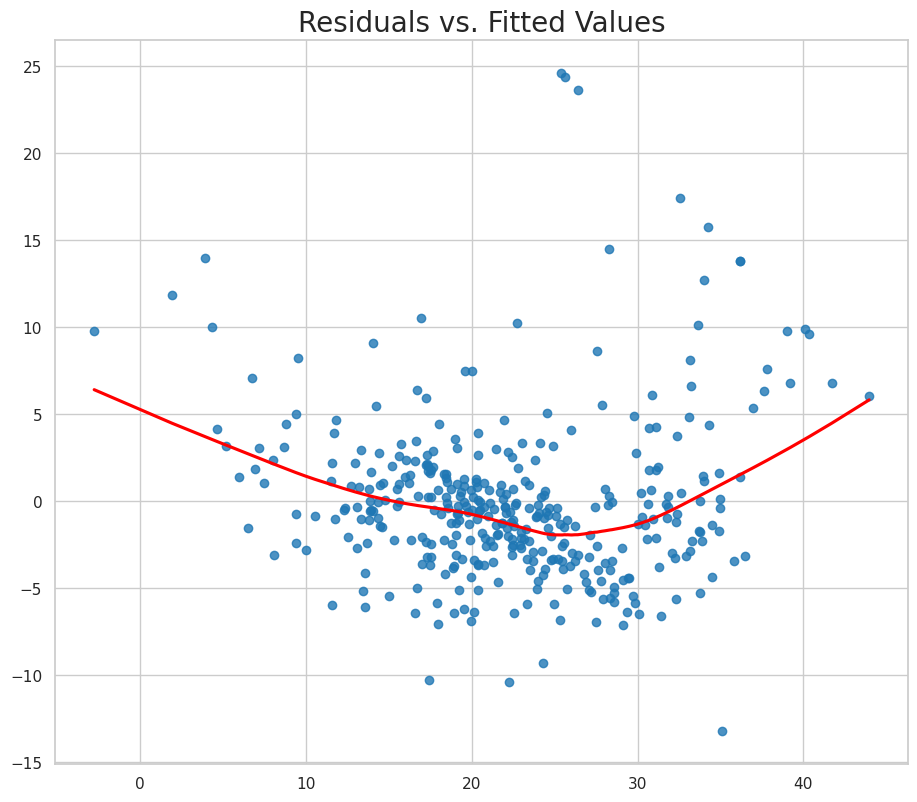

In [59]:
# Gráfico de residuos vs valores ajustados para verificar homocedasticidad
sns.regplot(
    data=df,
    x = fitted_values,
    y = residuals_sm,
    lowess=True,
    line_kws={'color': 'red'},
    ci=None
)
plt.title('Residuals vs. Fitted Values', fontsize=20);

3.1 Modelo estandarizado para mejor visualizacion

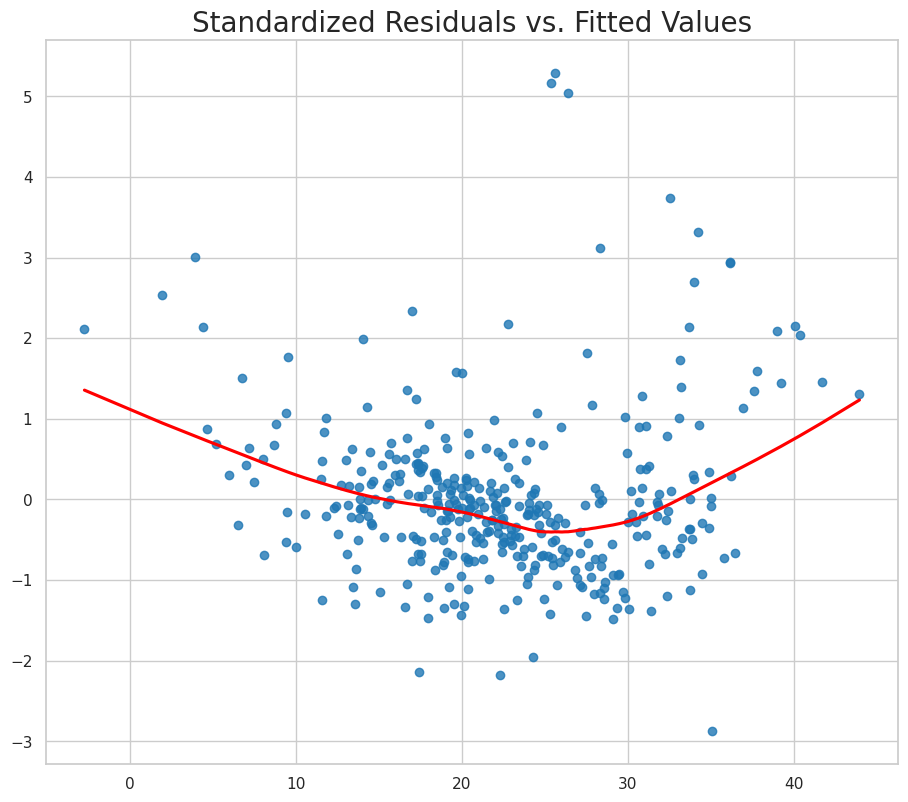

In [60]:
residuals_std = lin_reg_sm.get_influence().resid_studentized_internal

sns.regplot(
    data = df,
    x = fitted_values,
    y = residuals_std,
    lowess=True,
    line_kws={'color': 'red'},
    ci=None
)
plt.title('Standardized Residuals vs. Fitted Values', fontsize=20);

3.2 **Breusch-Paga** Test for test equal variance (homocedasticity)

In [61]:
bp_test = sm.stats.diagnostic.het_breuschpagan(residuals_sm, lin_reg_sm.model.exog)
print(f'LM Statistic: {bp_test[0]}')
print(f'LM-Test p-value: {bp_test[1]}')


LM Statistic: 51.45901922174517
LM-Test p-value: 1.6719426732537149e-06


**Observation**
- P-value es menor a 0.05, por lo cual se rechaza la hipotesis de hoscedasticad y existe heterocedasticidad 

### 4. Independencia 



In [62]:
print("Durbin-Watson:", sm.stats.stattools.durbin_watson(residuals_sm))

Durbin-Watson: 1.86756288260678


**Observacion**

- D-W es < 2 por lo tanto indica una postiva autocorrelación

### 5. Multicolianilidad 

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]

pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
vif,1.73723,2.627307,3.856971,1.077297,4.458539,1.892447,3.235926,4.269367,8.179646,9.982152,1.866287,1.348138,2.99954


**Observation** > 5
- RAD
- TAX 

### Verificando la relacion lineal entre dos variables

In [64]:
# Correlation between explanatory variables
from scipy.stats import pearsonr
print(f"Pearson Correlation: {pearsonr(X['TAX'], lin_reg_sm.resid)}")
# Corr and p-value
# p-value < 0.05, reject null hypothesis, there is a correlation between the variables

Pearson Correlation: PearsonRResult(statistic=3.331536435613458e-15, pvalue=0.9999999999999502)


**Observation**

- No hay una correlación lineal significativa entre la variable TAX y los residuos del modelo.
Este es un buen indicador, ya que en un modelo de regresión lineal bien ajustado, no debería existir correlación entre las variables independientes (predictoras) y los residuos.

## Capitulo 2

### 1. Firts
Eliminaremos los outliers de la variable objetivo (target)

- El minimo nos da negativo -4.41, por lo que obtaremos por otro método

In [65]:
p3 = y.mean() + 3 * y.std()
p1 = y.mean() - 3 * y.std()

print(f'Highest allowed, 3 std devs from mean: {p3}')
print(f'Lowest allowed, 3 std devs from mean: {p1}')

# finding outliers

outliers = X[(y > p3) | (y < p1)]
print(outliers)

Highest allowed, 3 std devs from mean: 49.107383436006884
Lowest allowed, 3 std devs from mean: -4.418201377959392
        CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
161  1.46336   0.0  19.58   0.0  0.605  7.489   90.8  1.9709   5.0  403.0   
186  0.05602   0.0   2.46   0.0  0.488  7.831   53.6  3.1992   3.0  193.0   
372  8.26725   0.0  18.10   1.0  0.668  5.875   89.6  1.1296  24.0  666.0   
283  0.01501  90.0   1.21   1.0  0.401  7.923   24.8  5.8850   1.0  198.0   
163  1.51902   0.0  19.58   1.0  0.605  8.375   93.9  2.1620   5.0  403.0   
368  4.89822   0.0  18.10   0.0  0.631  4.970  100.0  1.3325  24.0  666.0   
369  5.66998   0.0  18.10   1.0  0.631  6.683   96.8  1.3567  24.0  666.0   
166  2.01019   0.0  19.58   0.0  0.605  7.929   96.2  2.0459   5.0  403.0   
195  0.01381  80.0   0.46   0.0  0.422  7.875   32.0  5.6484   4.0  255.0   
371  9.23230   0.0  18.10   0.0  0.631  6.216  100.0  1.1691  24.0  666.0   

     PTRATIO       B  LSTAT  
161    

In [66]:
### run if you'll use the model only

# X2 = X[(y <= p3) | (y >= p1)]
# y2 = y[(y <= p3) | (y >= p1)]

### 1. Using IQR (Inter quartile range) method

1.1 Encontrando los límites 

In [67]:
# finding IQR
percentile_25 = y.quantile(0.25) #Q1
percentile_75 = y.quantile(0.75) #Q3

iqr = percentile_75 - percentile_25

# finding the limits upper and lower

upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr

print(f'Upper limit: {upper_limit}')
print(f'Lower limit: {lower_limit}')


Upper limit: 36.849999999999994
Lower limit: 5.2500000000000036


1.2. analizando los outliers en X 

In [68]:
X.loc[(y > upper_limit) | (y < lower_limit)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
180,0.06588,0.0,2.46,0.0,0.4880,7.765,83.3,2.7410,3.0,193.0,17.8,395.56,7.56
98,0.08187,0.0,2.89,0.0,0.4450,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57
161,1.46336,0.0,19.58,0.0,0.6050,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73
157,1.22358,0.0,19.58,0.0,0.6050,6.943,97.4,1.8773,5.0,403.0,14.7,363.43,4.59
186,0.05602,0.0,2.46,0.0,0.4880,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45
372,8.26725,0.0,18.10,1.0,0.6680,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88
256,0.01538,90.0,3.75,0.0,0.3940,7.454,34.2,6.3361,3.0,244.0,15.9,386.34,3.11
283,0.01501,90.0,1.21,1.0,0.4010,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32
228,0.29819,0.0,6.20,0.0,0.5040,7.686,17.0,3.3751,8.0,307.0,17.4,377.51,3.92


1.3. Creamos un nuevo df dejando los outliers afuera

In [69]:
X_2 = X.loc[(y <= upper_limit) & (y >= lower_limit)] 
y_2 = y.loc[(y <= upper_limit) & (y >= lower_limit)]

print(f'Shape of X_2: {X_2.shape}')
print(f'Shape of y_2: {y_2.shape}')

Shape of X_2: (352, 13)
Shape of y_2: (352,)


### 2. Dropping variable with hight VIF

2.1. Analizamos el VIF del método 1

In [70]:
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]

pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
vif,1.73723,2.627307,3.856971,1.077297,4.458539,1.892447,3.235926,4.269367,8.179646,9.982152,1.866287,1.348138,2.99954


2.2. Analizamos la correlacion de las variables > 5, TAX y RAD

In [71]:
pd.concat([X_2[['TAX', 'RAD']], y_2], axis=1).corr()

,TAX,RAD,MEDV
TAX,1.000000,0.918772,-0.575629
RAD,0.918772,1.000000,-0.491530
MEDV,-0.575629,-0.491530,1.000000


- Primera impresion deberiamos eliminar RAD, ya que TAX tiene mayor correlacion con MEDV
- Analizando la tabla correlacion del primer modelo, vemos que TAX tiene mayor correlacion con otras variavlas y RAD no; por lo tanto, nos conviene eliminar TAX. 

2.3. Eliminamos la variable TAX

In [72]:
X_2 = X_2.drop('TAX', axis=1)
X_2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,21.0,396.90,9.08
172,0.13914,0.0,4.05,0.0,0.510,5.572,88.5,2.5961,5.0,16.6,396.90,14.69
80,0.04113,25.0,4.86,0.0,0.426,6.727,33.5,5.4007,4.0,19.0,396.90,5.29
46,0.18836,0.0,6.91,0.0,0.448,5.786,33.3,5.1004,3.0,17.9,396.90,14.15
318,0.40202,0.0,9.90,0.0,0.544,6.382,67.2,3.5325,4.0,18.4,395.21,10.36


### 3. Fitting new lineal model 

Ajustamos el nuevo modelo lineal sin outliers y sin la variable TAX.

In [73]:
X_constant = sm.add_constant(X_2)
lin_reg_sm_2 = sm.OLS(y_2, X_constant).fit()

print(lin_reg_sm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     90.80
Date:                Wed, 21 Aug 2024   Prob (F-statistic):           4.28e-98
Time:                        09:31:06   Log-Likelihood:                -901.27
No. Observations:                 352   AIC:                             1829.
Df Residuals:                     339   BIC:                             1879.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.9822      4.175     10.296      0.0

**Resultados previos**
- R-Squared mayor al anterior modelo con 0.763
- AIC y BIC es menor que el anterior modelo; por lo tanto, este modelo es mejor.
- Tenemos ahora 'AGE' mayor a 0.05, lo cual nos dice que no es significativa, se tiene que analizar con el TEST de assumption. 

### Assumptions model_2 

### 1. Normality of residuals


In [74]:
residuals_sm_2 = lin_reg_sm_2.resid

fitted_values = lin_reg_sm_2.predict()

print(f'Mean of residuals: {residuals_sm_2.mean()}')

Mean of residuals: -1.6981365808471146e-14


1.1 Prueba de normalidad con Q-Q plot

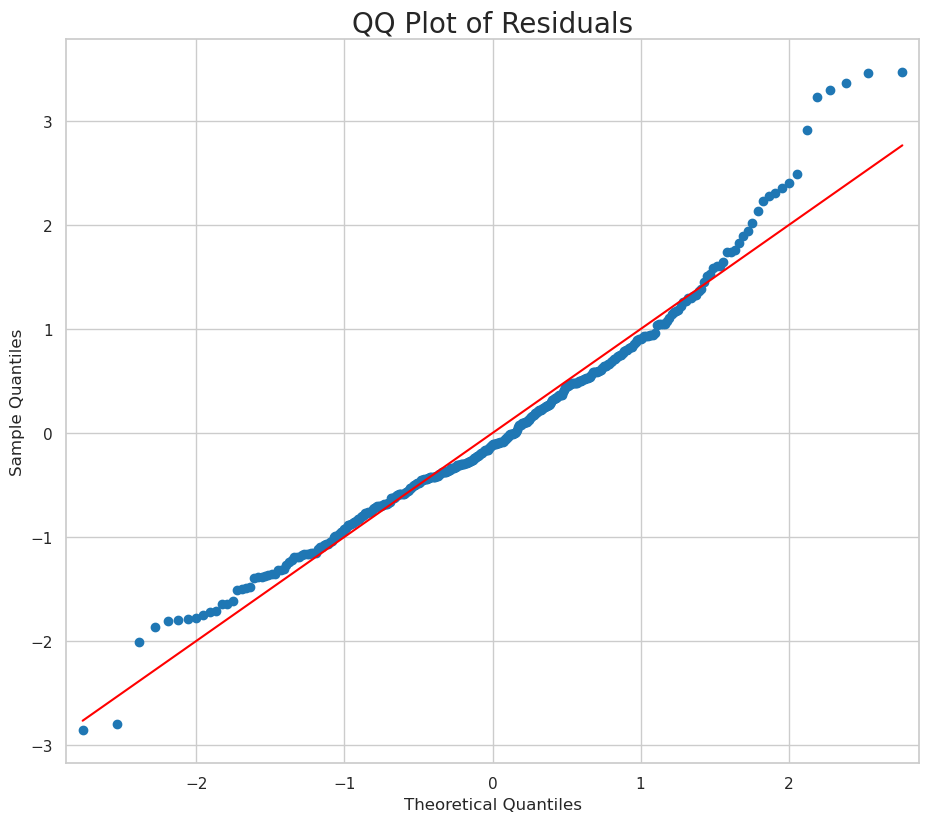

In [75]:
sm.graphics.qqplot(residuals_sm_2, line='s', fit=True);
plt.title('QQ Plot of Residuals', fontsize=20);

1.2 Shapiro-wilk

In [76]:
stats.shapiro(residuals_sm_2)

ShapiroResult(statistic=0.9727913862996416, pvalue=3.5173196861097867e-06)

**Observation**
- Con una p-value tan bajo (3.51-06) Rechazamos H0, los residuos no siguen una distribución normal.

### 2. Lineality 

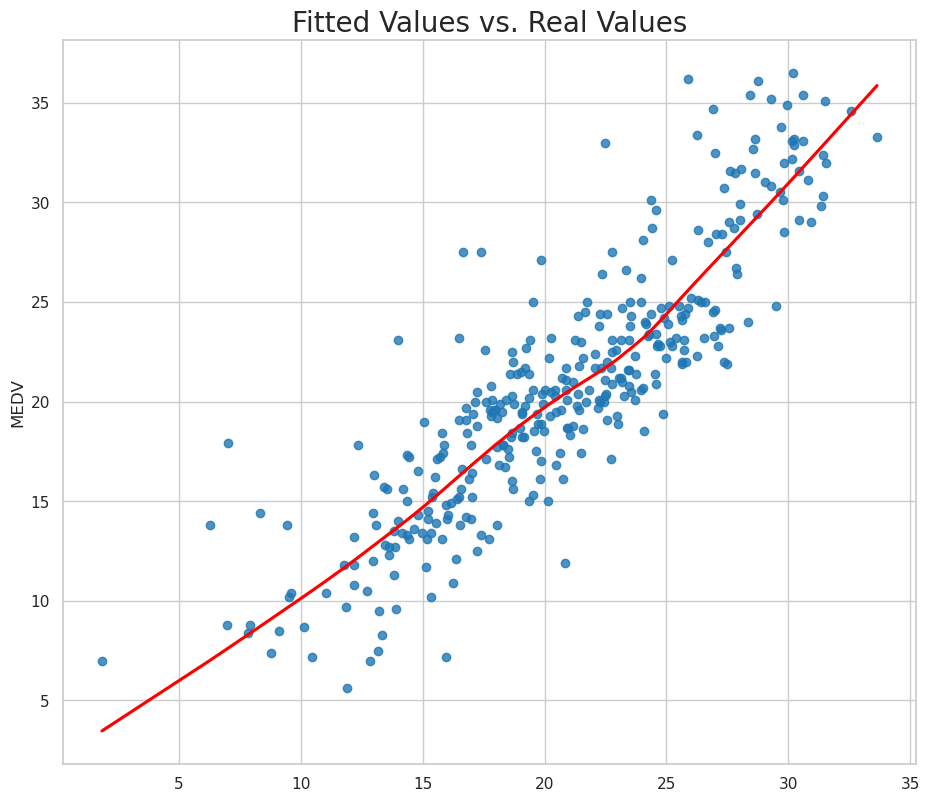

In [78]:
sns.regplot(
    data=df,
    x = fitted_values,
    y = y_2,
    lowess=True,
    line_kws={'color': 'red'},
    ci=None
);
plt.title('Fitted Values vs. Real Values', fontsize=20);

**Observation**
- Existe ligera mejora en la linealidad y la media es cercana a 0

### 3. Homocedasticidad (Igualdad de varianzas)

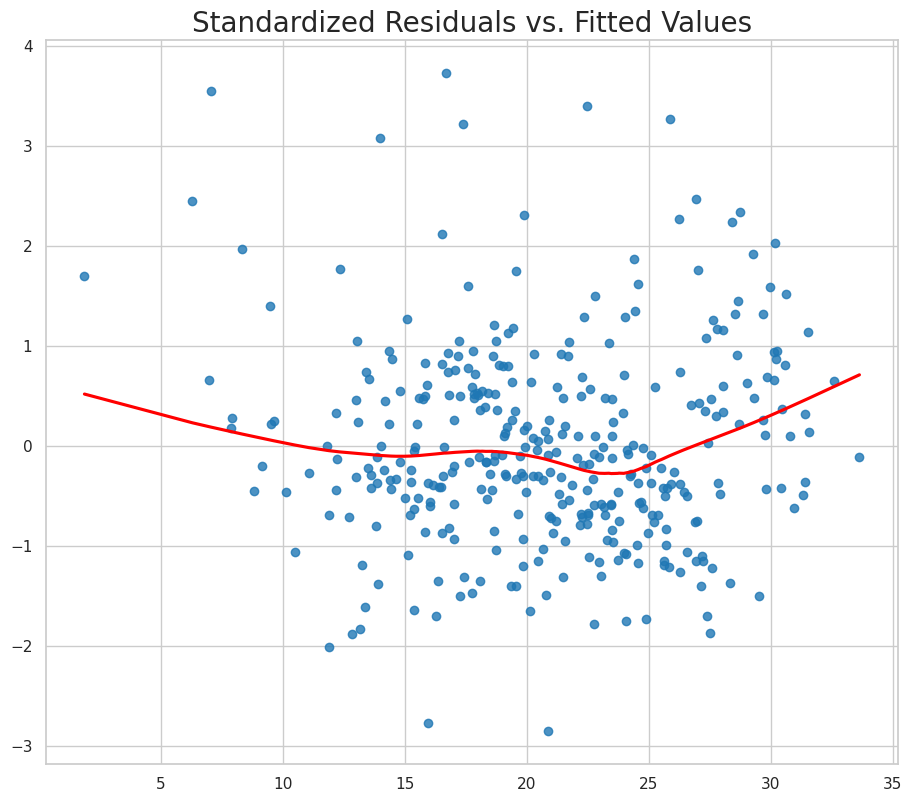

In [81]:
residuals_std = lin_reg_sm_2.get_influence().resid_studentized_internal

sns.regplot(
    data = df,
    x = fitted_values,
    y = residuals_std,
    lowess=True,
    line_kws={'color': 'red'},
    ci=None
);
plt.title('Standardized Residuals vs. Fitted Values', fontsize=20);

3.2 **Breusch-Paga** Test for test equal variance (homocedasticity)

In [82]:
bp_test = sm.stats.diagnostic.het_breuschpagan(residuals_sm_2, lin_reg_sm_2.model.exog)
print(f'LM Statistic: {bp_test[0]}')
print(f'LM-Test p-value: {bp_test[1]}')

LM Statistic: 17.947350356917106
LM-Test p-value: 0.11729852205538975


**Resultados**
- P-value es mayor a 0.05, por lo cual no se rechaza la H0 y existe Homoscedasticidad

### 4. Independencia 


In [83]:
print("Durbin-Watson:", sm.stats.stattools.durbin_watson(residuals_sm_2))

Durbin-Watson: 2.0488891280998103


**Resultados**
- No existe auto correlación D-W = 2

### 5. Multicolianilidad 

In [84]:
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]

pd.DataFrame({'vif': vif[1:]}, index=X_2.columns).T

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
vif,1.780023,2.458202,3.262082,1.05583,4.364562,1.760462,3.323276,4.422918,2.791628,1.707564,1.37974,3.112462


**Resultados**
- No existe multicolianilidad 

## Capitulo 3 

1. Identificación y eliminación de los puntos de influencia en el modelo
2. Ya se elimino previamente las variables > 0.05 del VIF
3. Ya se eliminó la variable 'TAX'
4. Que tanto mejora el modelo?

### 3.1 Leverege points (apalancamiento)

Puntos de influencia que se deben discutir, son puntos que podrian estar afectando al desempeño del modelo, para eso utilizaremos el criterio "COOK"

La distancia cook son aquellos que son < 0.05

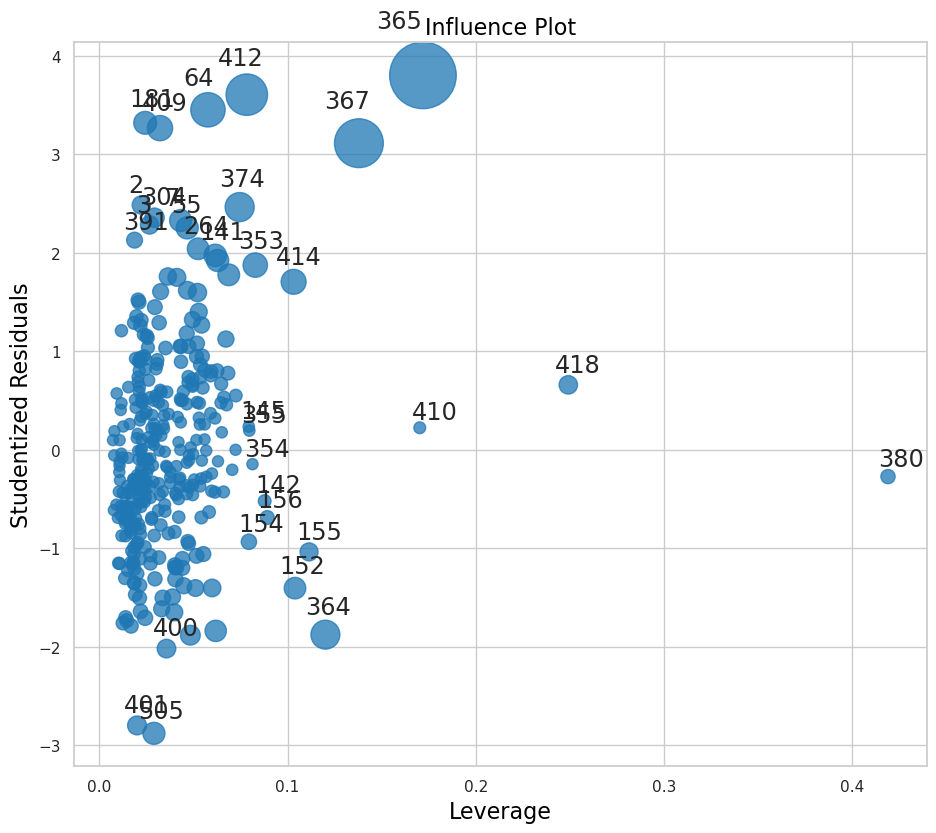

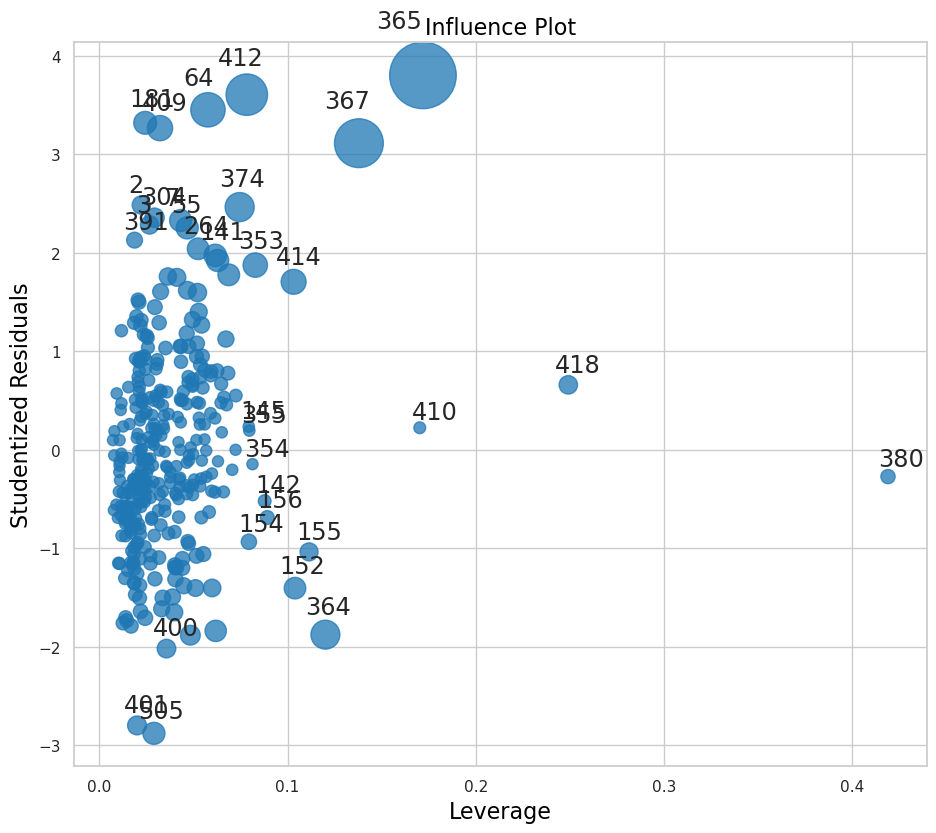

In [95]:
#fig, ax = plt.subplots(1, 2, figsize=(12, 8))
sm.graphics.influence_plot(
    lin_reg_sm_2, 
    #ax=ax, 
    alpha=0.05,
    criterion='cooks'
)

3.2 Observamos los puntos de influencia para X_2 & y_2, creamos una instancia y obtenemos la distancia de cook

In [99]:
X_2.loc[[364, 367, 412, 374]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
364,3.47428,0.0,18.1,1.0,0.718,8.780,82.9,1.9047,24.0,20.2,354.55,5.29
367,13.52220,0.0,18.1,0.0,0.631,3.863,100.0,1.5106,24.0,20.2,131.42,13.33
412,18.81100,0.0,18.1,0.0,0.597,4.628,100.0,1.5539,24.0,20.2,28.79,34.37
374,18.49820,0.0,18.1,0.0,0.668,4.138,100.0,1.1370,24.0,20.2,396.90,37.97


In [100]:
y_2.loc[[364, 367, 412, 374]]

364    21.9
367    23.1
412    17.9
374    13.8
Name: MEDV, dtype: float64

Mientras mayor sea la distancia de cooks,mayor es la influencia

In [102]:
# create instance of influence 
influence = lin_reg_sm_2.get_influence()

# obtain Cook's distance for each observation
cooks = influence.cooks_distance



Graficamos un scatter, podemos usar index o la variable mayor a 0.05 que es 'AGE' y 'RAD' en el modelo 1 y 2

Text(0, 0.5, "Cook's Distance")

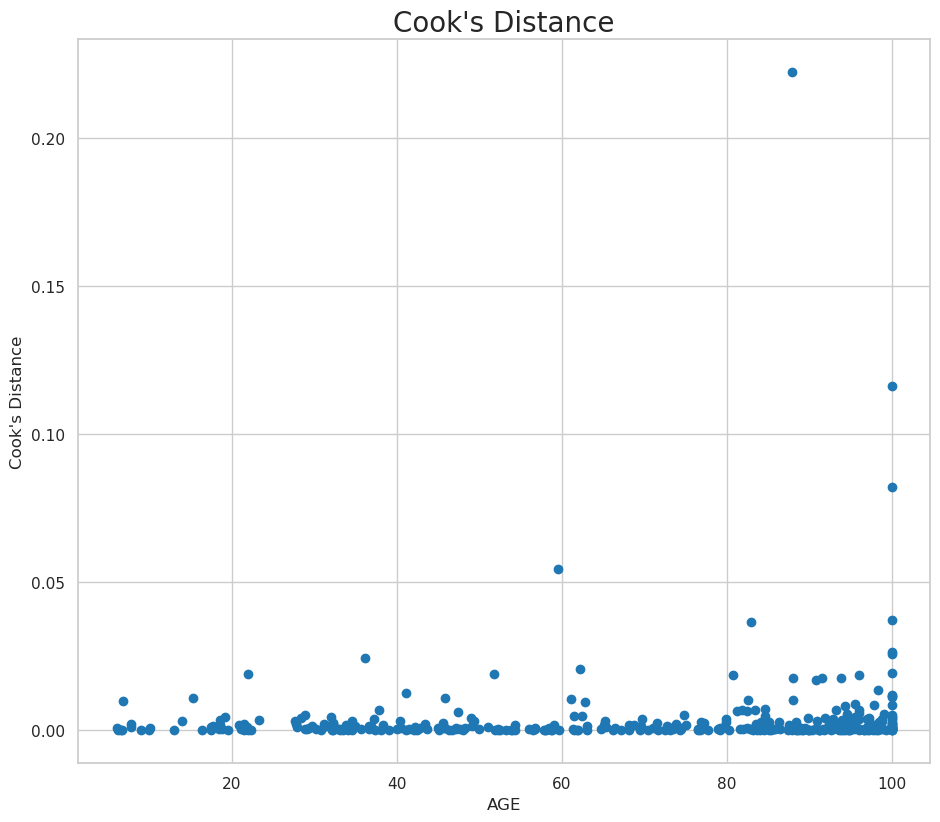

In [107]:
plt.scatter(
    X_2['AGE'],
    cooks[0],
)
plt.title("Cook's Distance", fontsize=20)
plt.xlabel('AGE')
plt.ylabel('Cook\'s Distance')

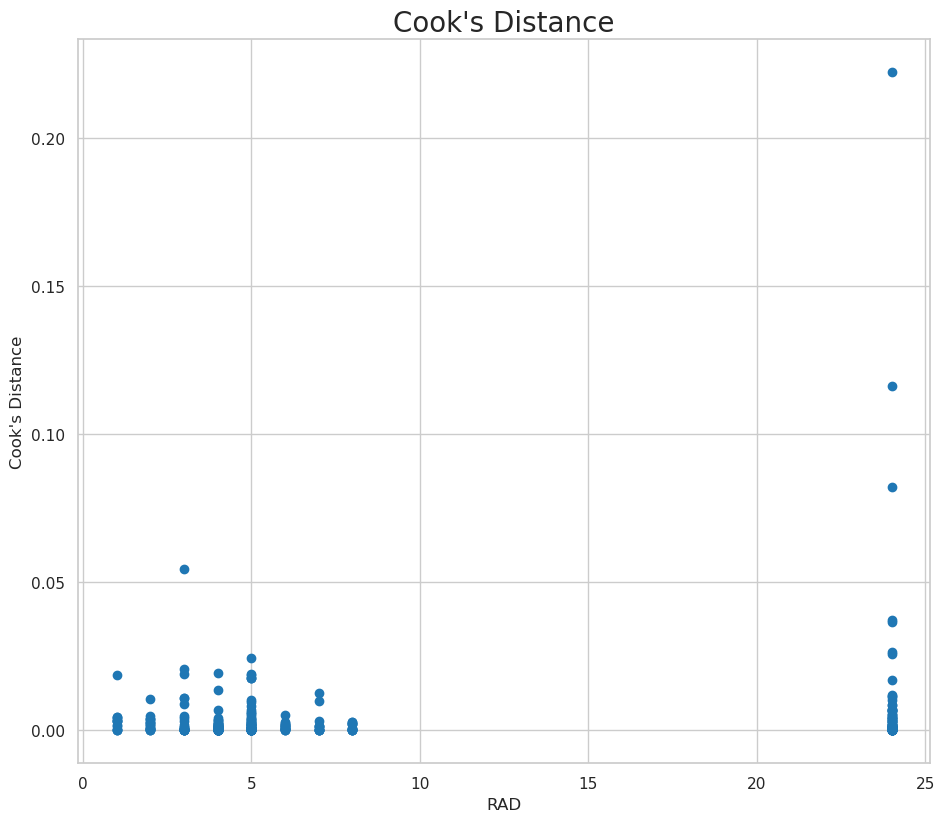

In [112]:
plt.scatter(
    X_2['RAD'],
    cooks[0],
);
plt.title("Cook's Distance", fontsize=20)
plt.xlabel('RAD')
plt.ylabel('Cook\'s Distance')
plt.show()

3.3 Eliminamos leverege observation > 0.05

In [117]:
k = cooks[0] > 0.05
X_2[k]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
365,4.55587,0.0,18.10,0.0,0.7180,3.561,87.9,1.6132,24.0,20.2,354.70,7.12
412,18.81100,0.0,18.10,0.0,0.5970,4.628,100.0,1.5539,24.0,20.2,28.79,34.37
367,13.52220,0.0,18.10,0.0,0.6310,3.863,100.0,1.5106,24.0,20.2,131.42,13.33
64,0.01951,17.5,1.38,0.0,0.4161,7.104,59.5,9.2229,3.0,18.6,393.24,8.05


In [118]:
y_2[k]

365    27.5
412    17.9
367    23.1
64     33.0
Name: MEDV, dtype: float64

Creamos un data set nuevo

In [123]:
X_3 = X_2.loc[k == False, :]
y_3 = y_2.loc[k == False]

print(f'Shape of X_3: {X_3.shape}')
print(f'Shape of y_3: {y_3.shape}')

Shape of X_3: (348, 12)
Shape of y_3: (348,)


### 4. Fitting new lineal model

In [124]:
X_constant = sm.add_constant(X_3)
lin_reg_sm_3 = sm.OLS(y_3, X_constant).fit()

print(lin_reg_sm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     108.9
Date:                Wed, 21 Aug 2024   Prob (F-statistic):          9.04e-108
Time:                        15:49:49   Log-Likelihood:                -864.22
No. Observations:                 348   AIC:                             1754.
Df Residuals:                     335   BIC:                             1805.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.4389      4.303      7.539      0.0

**Resultados**
- R-squared: 0.796, mayor que los dos anteriores modelos. 
- AIC y BIC ligeramente menor que el modelo 2
- Ahora tenemos en los coef 'RAD' > 0.05, lo cual nos dice que no es significativa, en el modelo 1 y en el modelo 2 no salian > 0.05

## Assumptions model_3

### 1. Normality of residuals


In [125]:
residuals_sm_3 = lin_reg_sm_3.resid
fitted_values = lin_reg_sm_3.predict()

print(f'Mean of residuals: {residuals_sm_3.mean()}')

Mean of residuals: 2.2500519965736505e-14


1.1 Prueba de normalidad con Q-Q plot

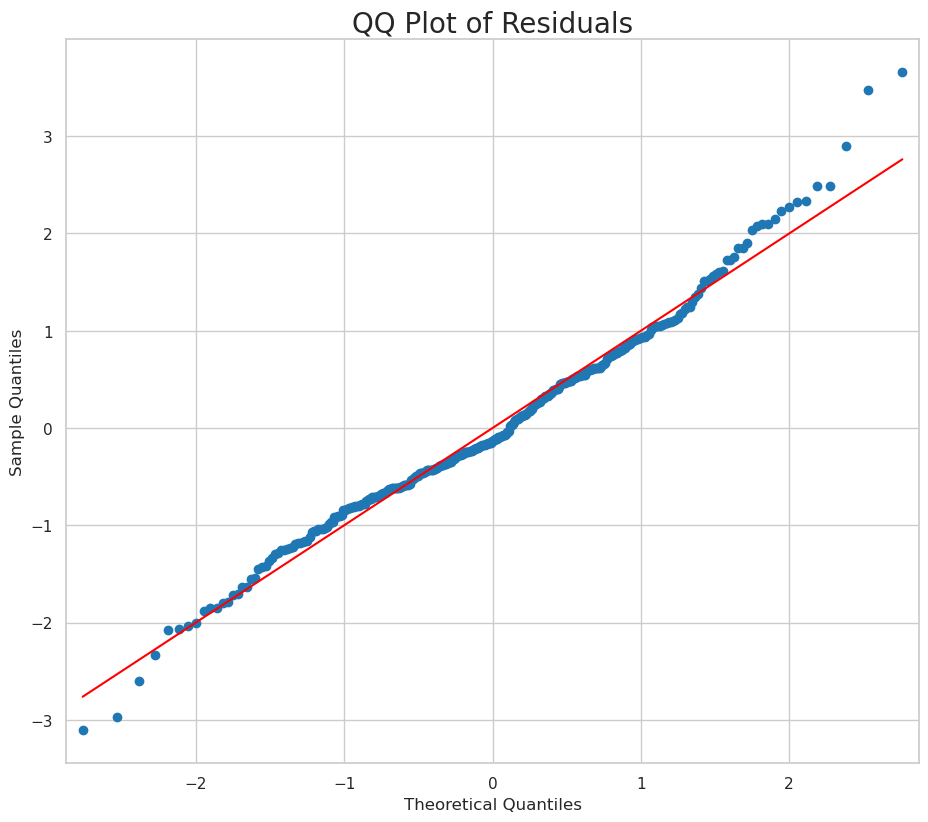

In [126]:
sm.graphics.qqplot(residuals_sm_3, line='s', fit=True);
plt.title('QQ Plot of Residuals', fontsize=20);

1.2 Shapiro - Wilk

In [127]:
stats.shapiro(residuals_sm_3)

ShapiroResult(statistic=0.9870924859525435, pvalue=0.003433394325137381)

**Observation**
- Con una p-value < 0.05 rechazamos H0, los residuos no siguen una distribución normal

### 2. Lineality

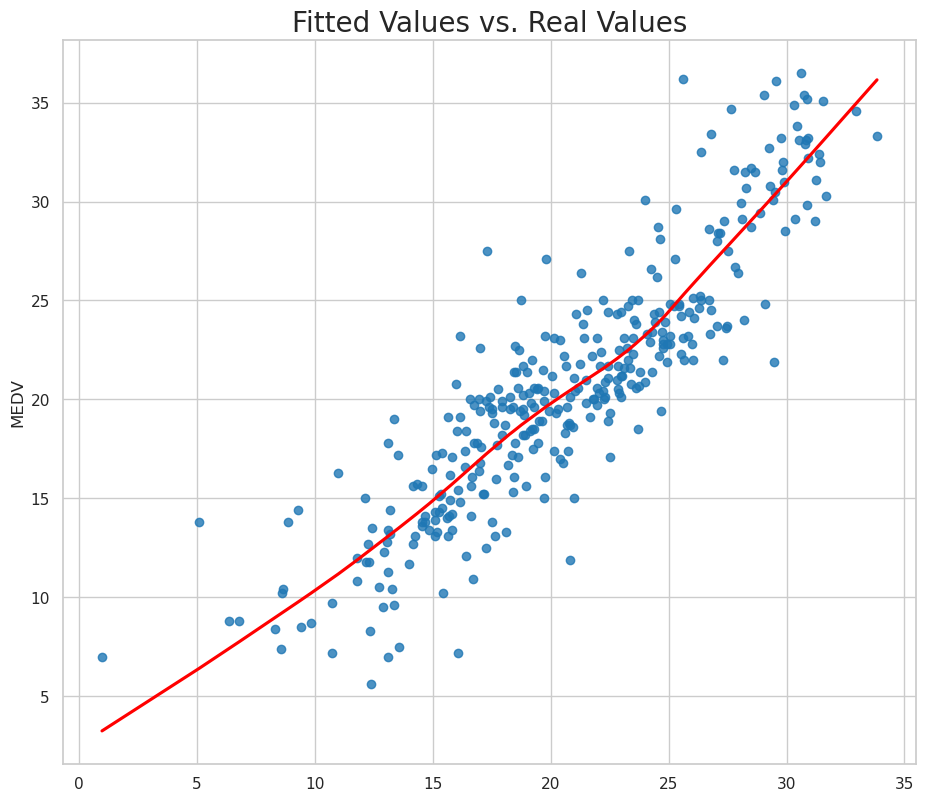

In [142]:
sns.regplot(
    data=df,
    x = fitted_values,
    y = y_3,
    lowess=True,
    line_kws={'color': 'red'},
    ci=None
);
plt.title('Fitted Values vs. Real Values', fontsize=20);


**Observation**
- Existe ligera mejora en la linealidad y la media es cercana a 0

### 3. Homocedasticidad (igualdad de varianzas)

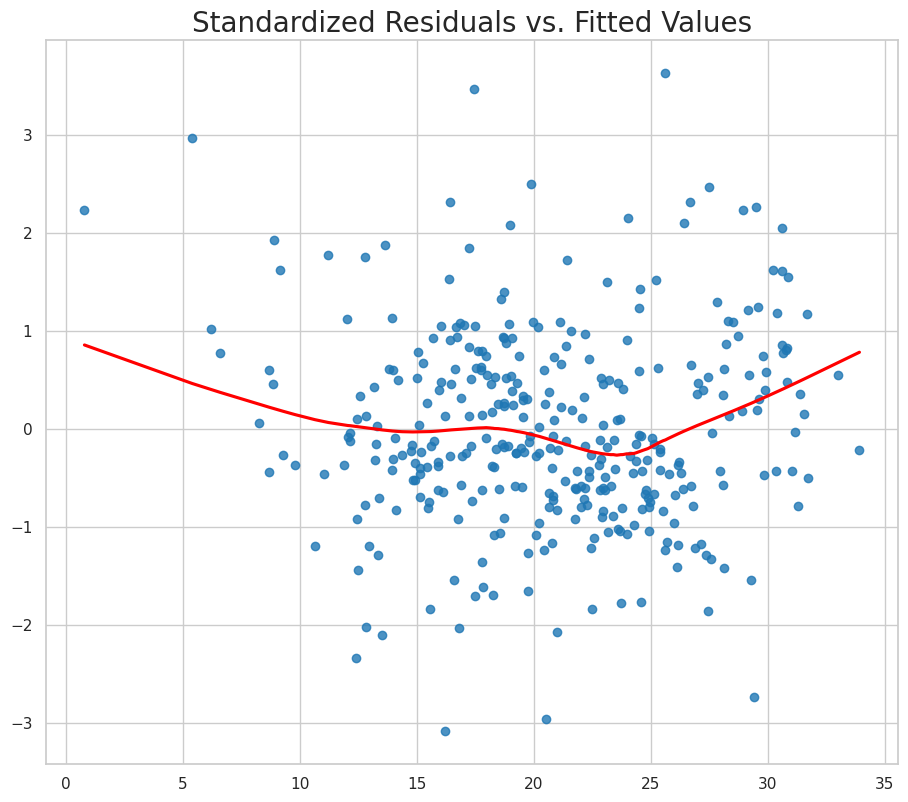

In [129]:
residuals_std = lin_reg_sm_3.get_influence().resid_studentized_internal

sns.regplot(
    data = df,
    x = fitted_values,
    y = residuals_std,
    lowess=True,
    line_kws={'color': 'red'},
    ci=None
);
plt.title('Standardized Residuals vs. Fitted Values', fontsize=20);

3.2 **Breusch-Paga** Test for test equal variance (homocedasticity)

In [130]:
bp_test = sm.stats.diagnostic.het_breuschpagan(residuals_sm_3, lin_reg_sm_3.model.exog)

print(f'LM Statistic: {bp_test[0]}')
print(f'LM-Test p-value: {bp_test[1]}')

LM Statistic: 24.875257971152124
LM-Test p-value: 0.015425174847038594


**Resultados**
- P-value es menor que 0.05, por lo cual  se rechaza la H0 y existe Heterocedasticidad

### 4. Independecia 

In [131]:
print("Durbin-Watson:", sm.stats.stattools.durbin_watson(residuals_sm_3))

Durbin-Watson: 2.1144347406818746


**Resultados**
- No existe auto correlación D-W cerca a 2

### 5. Multicolianilidad

In [133]:
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X_3.columns).T

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
vif,1.768827,2.541613,3.217636,1.056042,4.455494,2.116839,3.443869,4.539599,2.873556,1.706112,1.379091,3.657491


**Resultados**
- No existe multicolianilidad 

## Capítulo 4, eliminando una variable más.

Eliminaremos una variable mas, en este caso RAD
1. Este modelo, no tendrá la variable RAD ni TAX
2. Sin outliers
3. Sin puntos de influencia

In [134]:
X_4 = X_3.drop('RAD', axis=1)
X_constant = sm.add_constant(X_4)
lin_reg_sm_4 = sm.OLS(y_3, X_constant).fit()

lin_reg_sm_4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     118.5
Date:                Wed, 21 Aug 2024   Prob (F-statistic):          1.69e-108
Time:                        16:43:25   Log-Likelihood:                -864.99
No. Observations:                 348   AIC:                             1754.
Df Residuals:                     336   BIC:                             1800.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.2551      3.916      7.726      0.000      22.552      37.958
CRIM          -0.0837      0.022     -3.859      0.000      -0.126      -0.041
ZN             0.0264      0.011      2.344      0.020       0.004       0.049
INDUS         -0.0939      0.042     -2.244      0.025      -0.176      -0.012
CHAS           1.4397      0.619      2.325      0.021       0.221       2.658
NOX          -12.1053      2.633     -4.598      0.000     -17.284      -6.927
RM             3.0417      0.396      7.680      0.000       2.263       3.821
AGE           -0.0370      0.010     -3.548      0.000      -0.057      -0.016
DIS           -0.9963      0.159     -6.268      0.000      -1.309      -0.684
PTRATIO       -0.7285      0.092     -7.951      0.000      -0.909      -0.548
B              0.0079      0.002      3.865      0.000       0.004       0.012
LSTAT         -0.2639      0.043     -6.150      0.000      -0.348      -0.179
==============================================================================
Omnibus:                       13.901   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.322
Skew:                           0.340   Prob(JB):                     0.000105
Kurtosis:                       3.895   Cond. No.                     9.98e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Resultados**
- R-squared: 0.795, es igual que el modelo 3. 
- AIC y BIC ligeramente menor que el modelo anteriores
- Ahora todas las variables son significativas, lo cual es mucho mejor que los anteriores.

## ASSUMPTION MODEL_4

### 1. Normality of residuals

In [135]:
residuals_sm_4 = lin_reg_sm_4.resid
fitted_values = lin_reg_sm_4.predict()

print(f'Mean of residuals: {residuals_sm_4.mean()}')

Mean of residuals: -2.2061535229562882e-14


1.1 Prueba de normalidad con Q-Q plot

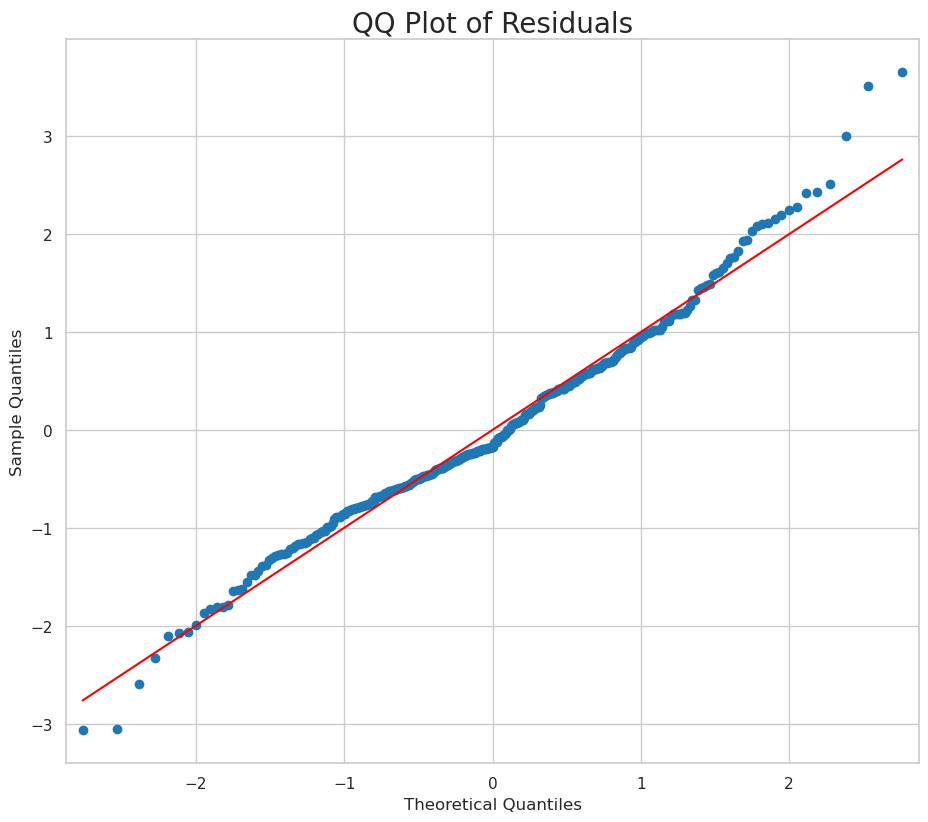

In [139]:
sm.graphics.qqplot(residuals_sm_4, line='s', fit=True);
plt.title('QQ Plot of Residuals', fontsize=20);

1.2 Shapiro - wilk

In [138]:
stats.shapiro(residuals_sm_4)

ShapiroResult(statistic=0.9855484207411028, pvalue=0.0014872786381673346)

**Observation**
- Con una p-value < 0.05 rechazamos H0, los residuos no siguen una distribución normal

### 2. Lineality

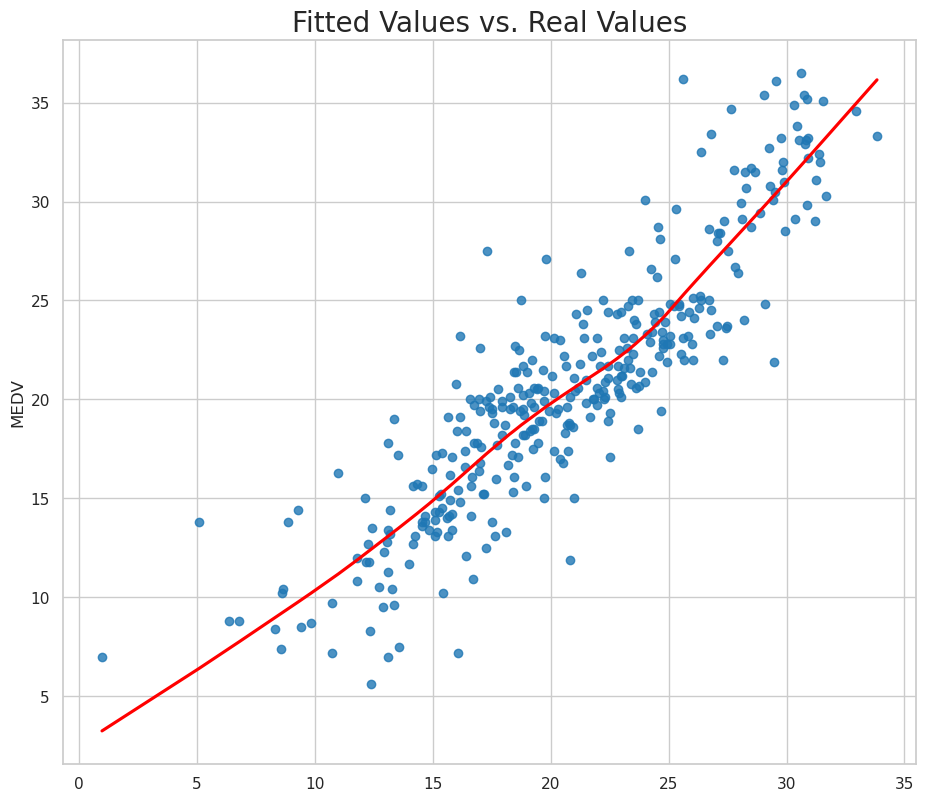

In [141]:
sns.regplot(
    data=df,
    x = fitted_values,
    y = y_3,
    lowess=True,
    line_kws={'color': 'red'},
    ci=None
);
plt.title('Fitted Values vs. Real Values', fontsize=20);


**Observation**
- Existe ligera mejora en la linealidad y la media es cercana a 0

### 3. Homocedasticidad (igualidad de varianzas)

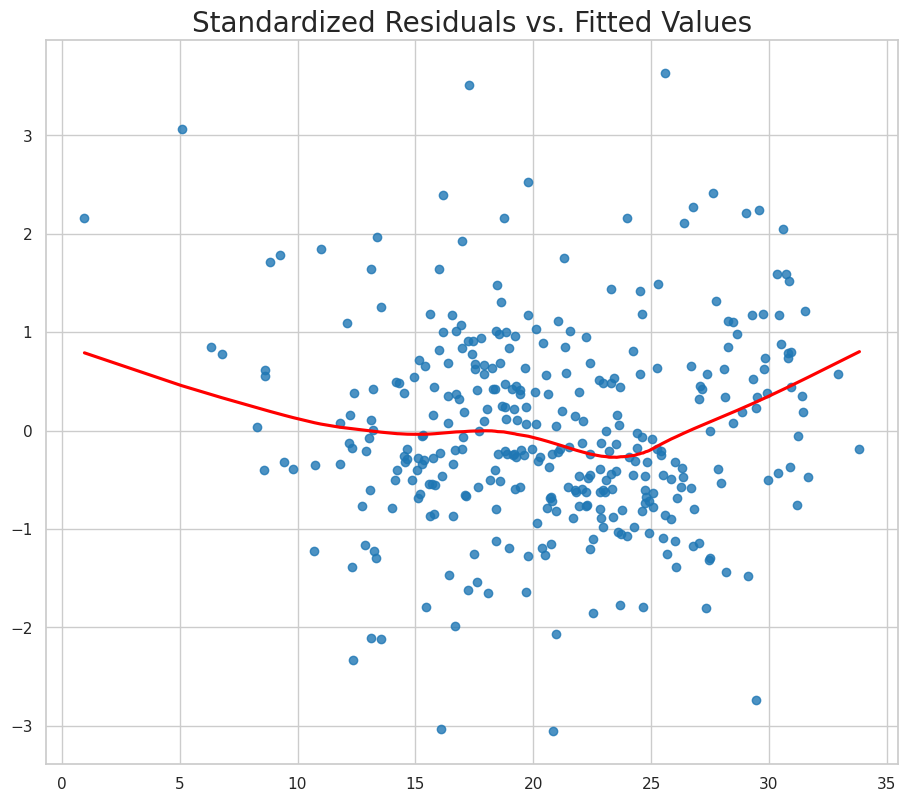

In [143]:
residuals_sm = lin_reg_sm_4.get_influence().resid_studentized_internal

sns.regplot(
    data = df,
    x = fitted_values,
    y = residuals_sm,
    lowess=True,
    line_kws={'color': 'red'},
    ci=None
);
plt.title('Standardized Residuals vs. Fitted Values', fontsize=20);

3.2 **Breusch-Paga** Test for test equal variance (homocedasticity)

In [144]:
bp_test = sm.stats.diagnostic.het_breuschpagan(residuals_sm_4, lin_reg_sm_4.model.exog)

print(f'LM Statistic: {bp_test[0]}')
print(f'LM-Test p-value: {bp_test[1]}')

LM Statistic: 21.799962929337614
LM-Test p-value: 0.025969567834469156


**Resultados**
- P-value es menor que 0.05, por lo cual  se rechaza la H0 y existe Heterocedasticidad

### 4. Independencia

In [145]:
print("Durbin-Watson:", sm.stats.stattools.durbin_watson(residuals_sm_4))

Durbin-Watson: 2.1235296982394973


**Resultados**
- No existe auto correlación D-W cerca a 2

### 5. Multicolianilidad

In [146]:
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X_4.columns).T

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT
vif,1.46591,2.53913,3.195058,1.055304,3.887354,1.924759,3.370182,4.535397,1.438681,1.365011,3.552946


**Resultados**
- No existe multicolianilidad 

## Models Performance

In [148]:
pred_train = lin_reg_sm.predict(sm.add_constant(X))
pred_train_2 = lin_reg_sm_2.predict(sm.add_constant(X_2))
pred_train_3 = lin_reg_sm_3.predict(sm.add_constant(X_3))
pred_train_4 = lin_reg_sm_4.predict(sm.add_constant(X_4))

print('Coefficient of determination (R^2): ')
print(f'R^2 Score train model 1: {r2_score(y, pred_train)}')
print(f'R^2 Score train model 2: {r2_score(y_2, pred_train_2)}')
print(f'R^2 Score train model 3: {r2_score(y_3, pred_train_3)}')
print(f'R^2 Score train model 4: {r2_score(y_3, pred_train_4)}')

print('\nMean Squared Error (MSE): ')
print(f'MSE train model 1: {mean_squared_error(y, pred_train)}')
print(f'MSE train model 2: {mean_squared_error(y_2, pred_train_2)}')
print(f'MSE train model 3: {mean_squared_error(y_3, pred_train_3)}')
print(f'MSE train model 4: {mean_squared_error(y_3, pred_train_4)}')


Coefficient of determination (R^2): 
R^2 Score train model 1: 0.7168057552393374
R^2 Score train model 2: 0.7627068207872779
R^2 Score train model 3: 0.7959831904020425
R^2 Score train model 4: 0.7950760101593036

Mean Squared Error (MSE): 
MSE train model 1: 22.477983821877896
MSE train model 2: 9.806088845651578
MSE train model 3: 8.40546430399992
MSE train model 4: 8.44284000437805


In [152]:
X_new = sm.add_constant(X_test) # no habiamos eliminaod tax
pred_test = lin_reg_sm.predict(X_new)

X_new = sm.add_constant(X_test.drop(['TAX'], axis=1))
X_new_2 = sm.add_constant(X_test.drop(['TAX', 'RAD'], axis=1))
pred_test_2 = lin_reg_sm_2.predict(X_new)
pred_test_3 = lin_reg_sm_3.predict(X_new)
pred_test_4 = lin_reg_sm_4.predict(X_new_2)

print('Coefficient of determination (R^2): ')
print(f'R^2 Score test model 1: {r2_score(y_test, pred_test)}')
print(f'R^2 Score test model 2: {r2_score(y_test, pred_test_2)}')
print(f'R^2 Score test model 3: {r2_score(y_test, pred_test_3)}')
print(f'R^2 Score test model 4: {r2_score(y_test, pred_test_4)}')

print('\nMean Squared Error (MSE): ')
print(f'MSE test model 1: {mean_squared_error(y_test, pred_test)}')
print(f'MSE test model 2: {mean_squared_error(y_test, pred_test_2)}')
print(f'MSE test model 3: {mean_squared_error(y_test, pred_test_3)}')
print(f'MSE test model 4: {mean_squared_error(y_test, pred_test_4)}')



Coefficient of determination (R^2): 
R^2 Score test model 1: 0.7789410172622857
R^2 Score test model 2: 0.6493321352610416
R^2 Score test model 3: 0.6846532054649848
R^2 Score test model 4: 0.6857437634062609

Mean Squared Error (MSE): 
MSE test model 1: 21.897765396049504
MSE test model 2: 34.736623406515214
MSE test model 3: 31.237772107714836
MSE test model 4: 31.129743102726625
